In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.core import Dropout
from keras.layers.core import Activation
from keras.utils import np_utils
from keras import optimizers
from keras.layers.normalization import BatchNormalization
import os
os.environ['TF_CPP_MIN_VLOG_LEVEL'] = '3'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
import time
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
xtrain = xtrain.reshape(60000, 784) 
xtrain = xtrain.astype(np.float32)
xtrain /= 255
xtest = xtest.reshape(10000, 784)
xtest = xtest.astype(np.float32)
xtest/= 255
# Number of classes, one class for each of 10 digits.
num_classes = 10
ytest = np_utils.to_categorical(ytest,num_classes)
ytrain = np_utils.to_categorical(ytrain,num_classes)


In [6]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(16, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(10))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
# using mini batch GD
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer="adam")

In [7]:
# training the model and saving metrics in history
start = time.time()
history = model.fit(xtrain, ytrain, batch_size=128, epochs=20, verbose=2, validation_data=(xtest, ytest))
end = time.time()
saving the model
save_dir = "./results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
print("Training time %.2f" %(end-start))
fig

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 14s - loss: 0.8449 - acc: 0.7316 - val_loss: 0.3390 - val_acc: 0.9058
Epoch 2/20
 - 8s - loss: 0.3080 - acc: 0.9137 - val_loss: 0.2664 - val_acc: 0.9270
Epoch 3/20
 - 7s - loss: 0.2599 - acc: 0.9273 - val_loss: 0.2391 - val_acc: 0.9327
Epoch 4/20
 - 8s - loss: 0.2310 - acc: 0.9358 - val_loss: 0.2206 - val_acc: 0.9334
Epoch 5/20
 - 8s - loss: 0.2072 - acc: 0.9412 - val_loss: 0.1947 - val_acc: 0.9447
Epoch 6/20
 - 7s - loss: 0.1893 - acc: 0.9462 - val_loss: 0.1840 - val_acc: 0.9482
Epoch 7/20
 - 8s - loss: 0.1766 - acc: 0.9493 - val_loss: 0.1757 - val_acc: 0.9502
Epoch 8/20
 - 8s - loss: 0.1660 - acc: 0.9528 - val_loss: 0.1686 - val_acc: 0.9515
Epoch 9/20
 - 10s - loss: 0.1582 - acc: 0.9540 - val_loss: 0.1667 - val_acc: 0.9518
Epoch 10/20
 - 9s - loss: 0.1518 - acc: 0.9565 - val_loss: 0.1638 - val_acc: 0.9513
Epoch 11/20
 - 7s - loss: 0.1465 - acc: 0.9576 - val_loss: 0.1604 - v

In [9]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(16, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(10))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
# using mini batch GD
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer="AdaGrad")

In [11]:
# training the model and saving metrics in history
start = time.time()
history = model.fit(xtrain, ytrain, batch_size=128, epochs=20, verbose=2, validation_data=(xtest, ytest))
end = time.time()
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
print("Training time %.2f" %(end-start))
fig

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 13s - loss: 0.6613 - acc: 0.8148 - val_loss: 0.4098 - val_acc: 0.8865
Epoch 2/20
 - 7s - loss: 0.3826 - acc: 0.8925 - val_loss: 0.3333 - val_acc: 0.9068
Epoch 3/20
 - 8s - loss: 0.3292 - acc: 0.9062 - val_loss: 0.3026 - val_acc: 0.9142
Epoch 4/20
 - 7s - loss: 0.3031 - acc: 0.9128 - val_loss: 0.2874 - val_acc: 0.9183
Epoch 5/20
 - 8s - loss: 0.2871 - acc: 0.9182 - val_loss: 0.2740 - val_acc: 0.9234
Epoch 6/20
 - 7s - loss: 0.2751 - acc: 0.9214 - val_loss: 0.2662 - val_acc: 0.9238
Epoch 7/20
 - 8s - loss: 0.2658 - acc: 0.9246 - val_loss: 0.2615 - val_acc: 0.9259
Epoch 8/20
 - 7s - loss: 0.2585 - acc: 0.9265 - val_loss: 0.2526 - val_acc: 0.9291
Epoch 9/20
 - 8s - loss: 0.2524 - acc: 0.9284 - val_loss: 0.2465 - val_acc: 0.9301
Epoch 10/20
 - 7s - loss: 0.2467 - acc: 0.9303 - val_loss: 0.2430 - val_acc: 0.9306
Epoch 11/20
 - 8s - loss: 0.2419 - acc: 0.9313 - val_loss: 0.2406 - val_acc: 0.9323
Epoch 12/20
 - 7s - loss: 0.2379 -

In [13]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(16, input_shape=(784,)))
model.add(Activation('relu'))                            

model.add(Dense(10))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))
# using mini batch GD
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer="RMSProp")

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 10s - loss: 0.6719 - acc: 0.8073 - val_loss: 0.3288 - val_acc: 0.9031
Epoch 2/20
 - 8s - loss: 0.3054 - acc: 0.9123 - val_loss: 0.2658 - val_acc: 0.9229
Epoch 3/20
 - 7s - loss: 0.2608 - acc: 0.9254 - val_loss: 0.2404 - val_acc: 0.9302
Epoch 4/20
 - 8s - loss: 0.2373 - acc: 0.9324 - val_loss: 0.2265 - val_acc: 0.9344
Epoch 5/20
 - 7s - loss: 0.2207 - acc: 0.9375 - val_loss: 0.2196 - val_acc: 0.9367
Epoch 6/20
 - 8s - loss: 0.2083 - acc: 0.9407 - val_loss: 0.2165 - val_acc: 0.9370
Epoch 7/20
 - 7s - loss: 0.1979 - acc: 0.9429 - val_loss: 0.2076 - val_acc: 0.9402
Epoch 8/20
 - 7s - loss: 0.1895 - acc: 0.9457 - val_loss: 0.2084 - val_acc: 0.9406
Epoch 9/20
 - 9s - loss: 0.1819 - acc: 0.9474 - val_loss: 0.1962 - val_acc: 0.9437
Epoch 10/20
 - 7s - loss: 0.1763 - acc: 0.9498 - val_loss: 0.1869 - val_acc: 0.9482
Epoch 11/20
 - 8s - loss: 0.1702 - acc: 0.9517 - val_loss: 0.1884 - val_acc: 0.9468
Epoch 12/20
 - 7s - loss: 0.1662 -

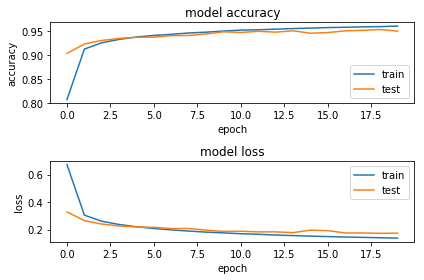

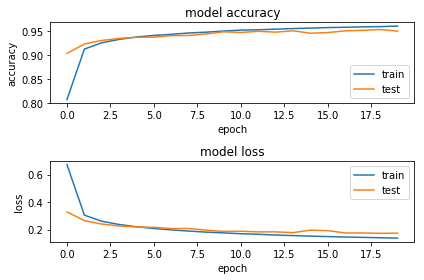

In [14]:
# training the model and saving metrics in history
start = time.time()
history = model.fit(xtrain, ytrain, batch_size=128, epochs=20, verbose=2, validation_data=(xtest, ytest))
end = time.time()
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
print("Training time %.2f" %(end-start))
fig